<a href="https://colab.research.google.com/github/woodstone10/deep_learning_study-python/blob/main/faster_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of training speed performance between optimizer algorithms of Neural network

---
- Stochastic Gradient Descent (SGD) with Nesterov Momentum
- RMSProp
- AdaGrad
- Adam

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
x_test = tf.keras.utils.normalize(x_test, axis=1)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000, 10) (10000, 28, 28) (10000, 10)


## Model

In [ ]:
def train_mnist(algo):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=x_train[0].shape),
        tf.keras.layers.Dense(250, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Faster Optimizers
    if algo == 'sgd': # Momentum Optimization
        optimizer = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
    if algo == 'rmsprop':  # RMSProp
        optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)
    if algo == 'adagrad': # AdaGrad
        optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001,
                                                initial_accumulator_value=0.1,
                                                epsilon=1e-07)
    if algo == 'adam': # Adam and Nadam Optimization
        optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

    model.compile(
        # optimizer=algo, # Method.1 it is working fine
        optimizer=optimizer, # Method.2
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )

    history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=False,
                    shuffle=True,
                    validation_data=(x_test, y_test))

    return history, model

In [ ]:
mnist = {
    'sgd': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []},
    'rmsprop': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []},
    'adagrad': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []},
    'adam': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []}
}


In [ ]:
iterations = 10
for optimizer in ['sgd', 'rmsprop', 'adagrad', 'adam']:
    print('--- {} ---'.format(optimizer))
    for i in range(iterations):
        print('starting ', i)
        history, model = train_mnist(optimizer)
        train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=False)
        val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=False)
        mnist[optimizer]['loss'].append(train_loss)
        mnist[optimizer]['history'].append(history)

--- sgd ---
starting  0
starting  1
starting  2
starting  3
starting  4
starting  5
starting  6
starting  7
starting  8
starting  9
--- rmsprop ---
starting  0
starting  1
starting  2
starting  3
starting  4
starting  5
starting  6
starting  7
starting  8
starting  9
--- adagrad ---
starting  0
starting  1
starting  2
starting  3
starting  4
starting  5
starting  6
starting  7
starting  8
starting  9
--- adam ---
starting  0
starting  1
starting  2
starting  3
starting  4
starting  5
starting  6
starting  7
starting  8
starting  9


## Comparison loss between faster optimizer

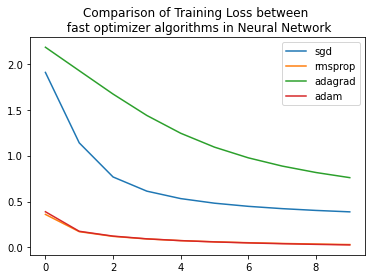

In [ ]:
key = ['loss'][0]
for opt in ['sgd', 'rmsprop', 'adagrad', 'adam']:
    hist = np.zeros(10)
    for h in mnist[opt]['history']:
        hist += np.array(h.history[key])
    mean = hist / 10
    plt.plot(mean, label=opt)
plt.legend()
plt.title('Comparison of Training Loss between \n fast optimizer algorithms in Neural Network')
plt.show()
